# FAST FOOD CASE STUDY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
!pip install -U yellowbrick
!pip install bioinfokit

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer




In [2]:
food=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [3]:
food.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
food.describe(include="all")


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [6]:
food.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [31]:
#count of missing values.
food.isna().sum()
food.isnull().sum()


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
food['VisitFrequency'].value_counts()
     


VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [8]:
food.columns.values


array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
       'Age', 'VisitFrequency', 'Gender'], dtype=object)

In [9]:
food.shape

(1453, 15)

In [10]:
import numpy as np


In [11]:
MD_x = food.iloc[:, 0:11].values.astype(str)
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [12]:
from sklearn.decomposition import PCA

# Assuming MD_x is a numpy array containing the data

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summarize the PCA results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print summary
print("PCA Summary:")
print("Explained Variance:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i + 1}: {variance:.4f}")
    
print("\nCumulative Variance:")
for i, variance in enumerate(cumulative_variance):
    print(f"PC{i + 1}: {variance:.4f}")

PCA Summary:
Explained Variance:
PC1: 0.2994
PC2: 0.1928
PC3: 0.1330
PC4: 0.0831
PC5: 0.0595
PC6: 0.0503
PC7: 0.0438
PC8: 0.0395
PC9: 0.0368
PC10: 0.0324
PC11: 0.0293

Cumulative Variance:
PC1: 0.2994
PC2: 0.4922
PC3: 0.6253
PC4: 0.7084
PC5: 0.7679
PC6: 0.8182
PC7: 0.8620
PC8: 0.9016
PC9: 0.9383
PC10: 0.9707
PC11: 1.0000


In [13]:
pca_df = pd.DataFrame(data=MD_pca ,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"])
pca_df.head()
     

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [14]:
 food["yummy"]= food["yummy"].replace({'Yes':1, 'No':0})
food["convenient"] = food["convenient"].replace({'Yes':1, 'No':0})
food["spicy"] = food["spicy"].replace({'Yes':1, 'No':0})
food["fattening"] = food["fattening"].replace({'Yes':1, 'No':0})
food["greasy"] = food["greasy"].replace({'Yes':1, 'No':0})
food["fast"] = food["fast"].replace({'Yes':1, 'No':0})
food["cheap"] = food["cheap"].replace({'Yes':1, 'No':0})
food["tasty"] = food["tasty"].replace({'Yes':1, 'No':0})
food["expensive"] = food["expensive"].replace({'Yes':1, 'No':0})
food["healthy"] = food["healthy"].replace({'Yes':1, 'No':0})
food["disgusting"] = food["disgusting"].replace({'Yes':1, 'No':0})

In [15]:
MD_x = food.iloc[:, 0:11].values.astype(str)
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
food.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [17]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(12), object(3)
memory usage: 170.4+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_18092\553517456.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=food,


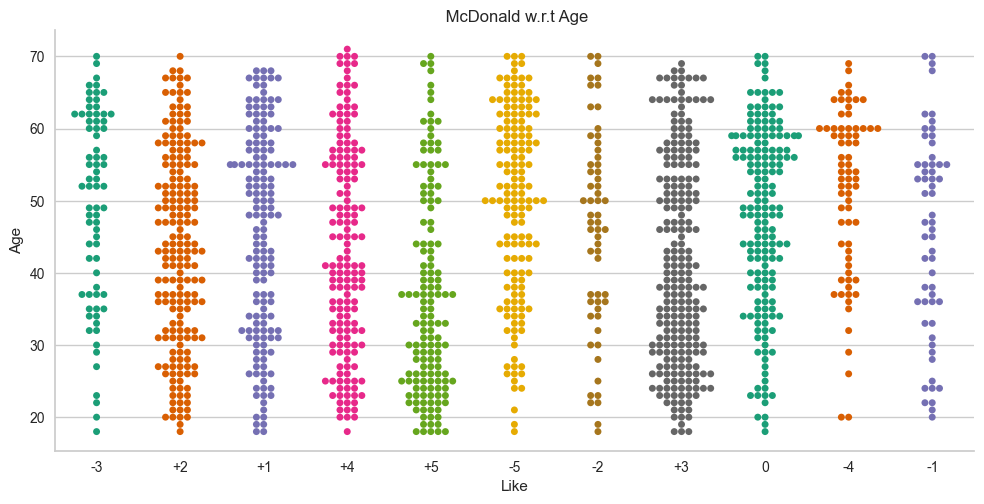

In [18]:
food['Like']= food['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=food, 
            orient="v", height=5, aspect=2, palette="Dark2",kind="swarm")
plt.title(' McDonald w.r.t Age')
plt.show()


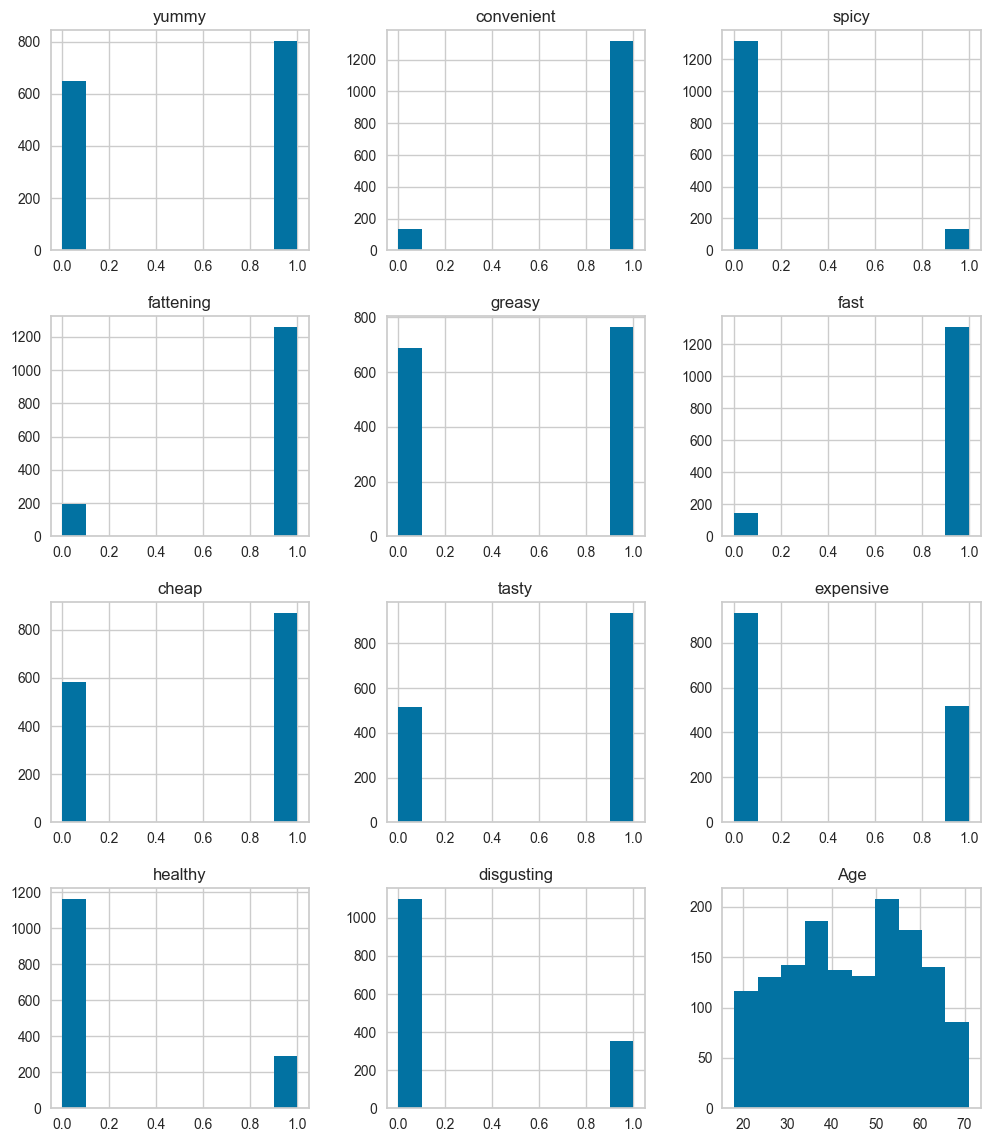

In [19]:

plt.rcParams['figure.figsize'] = (12,14)
food.hist()
plt.show()


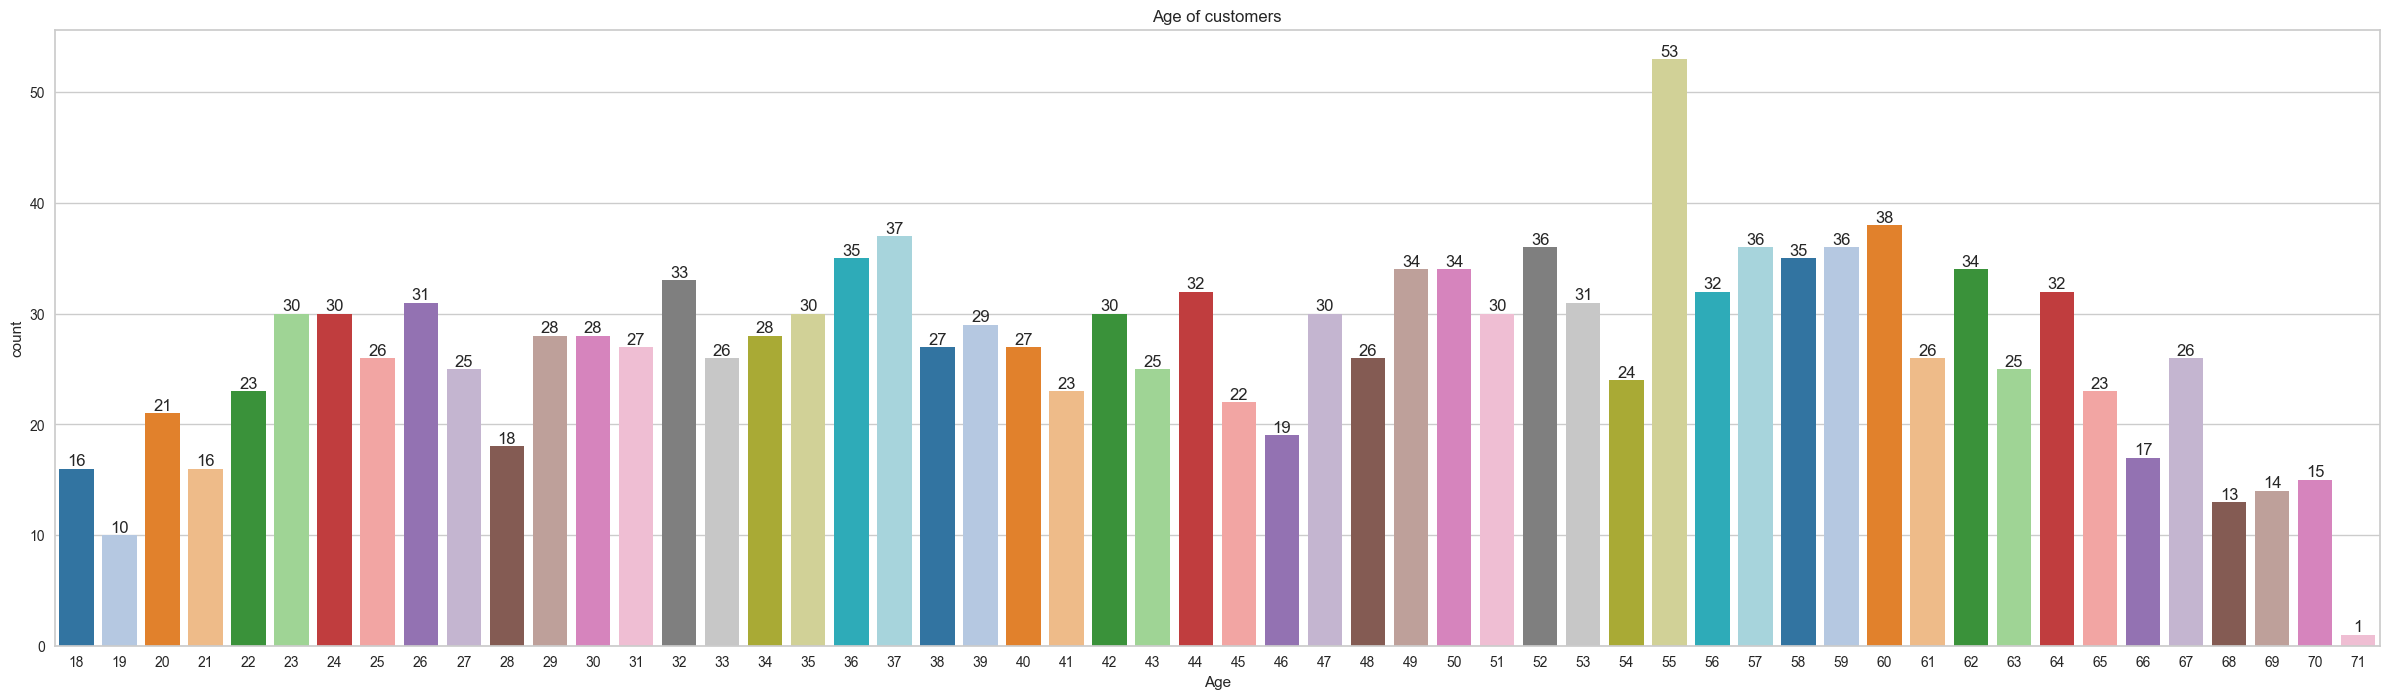

In [20]:
plt.rcParams['figure.figsize'] = (30, 8)
f = sns.countplot(x=food['Age'],palette = 'tab20')
f.bar_label(f.containers[0])
plt.title('Age of customers')
plt.show()


In [21]:
from sklearn.decomposition import PCA

# Assuming MD_x is a numpy array containing the data

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summarize the PCA results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print summary
print("PCA Summary:")
print("Explained Variance:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i + 1}: {variance:.4f}")
    
print("\nCumulative Variance:")
for i, variance in enumerate(cumulative_variance):
    print(f"PC{i + 1}: {variance:.4f}")

PCA Summary:
Explained Variance:
PC1: nan
PC2: nan
PC3: nan
PC4: nan
PC5: nan
PC6: nan
PC7: nan
PC8: nan
PC9: nan
PC10: nan
PC11: nan

Cumulative Variance:
PC1: nan
PC2: nan
PC3: nan
PC4: nan
PC5: nan
PC6: nan
PC7: nan
PC8: nan
PC9: nan
PC10: nan
PC11: nan


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


pca_df = pd.DataFrame(data=MD_pca ,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"])
pca_df.head()
     

sns.scatterplot(data=pca_df, x="PC1", y="PC2", palette="deep")


In [22]:
print((MD_pca, 1))


(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 1)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have already computed the PCA model and stored it in "MD_pca" variable

# Plotting the predicted values
predicted_values = MD_pca.predict()
plt.scatter(predicted_values[:, 0], predicted_values[:, 1], c="grey")

# Plotting the projection axes
projection_axes = MD_pca.transform(np.eye(MD_pca.n_features_))
plt.quiver(MD_pca.mean_[0], MD_pca.mean_[1], projection_axes[0, :], projection_axes[1, :], color='r', scale=3)

plt.show()


pca.explained_variance_ratio_


In [23]:
print(np.round(MD_pca, decimals=1))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = mcd_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df
     

plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


In [24]:
MD=food.iloc[:,0:11]


In [25]:
MD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [26]:
yummy =print(((MD['yummy'].value_counts(normalize=True)*100)[1]))


55.26496902959395


In [27]:
convenient =print(((MD['convenient'].value_counts(normalize=True)*100)[1]))


90.77770130763938


In [28]:
spicy =print(((MD['spicy'].value_counts(normalize=True)*100)[1]))


9.359944941500343


In [29]:
pca = PCA(n_components=11)
principal_components = pca.fit_transform(MD)
pca_df = pd.DataFrame(data=principal_components,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"])
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


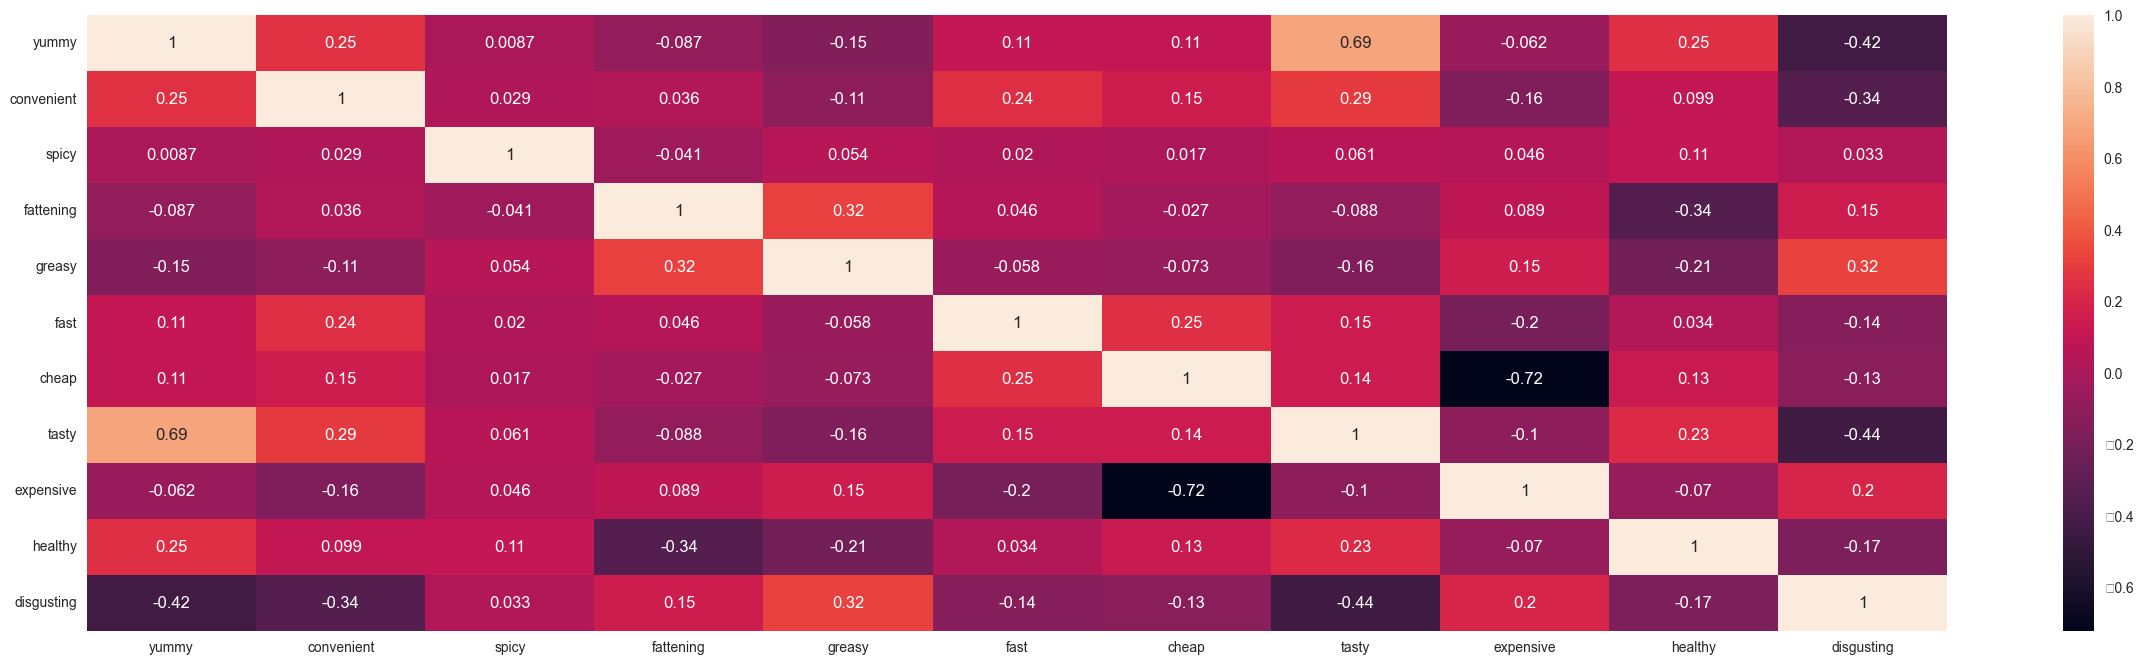

In [32]:
sns.heatmap(MD.corr(), annot=True)


In [30]:
linkage_matrix = linkage(md_x.T, method='complete', metric='euclidean')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=food.columns[:11], leaf_rotation=90)
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


NameError: name 'linkage' is not defined

In [33]:
wcss = []
for i in range(1,11):
 
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 11)
  kmeans.fit(MD)
  wcss.append(kmeans.inertia_)
     


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

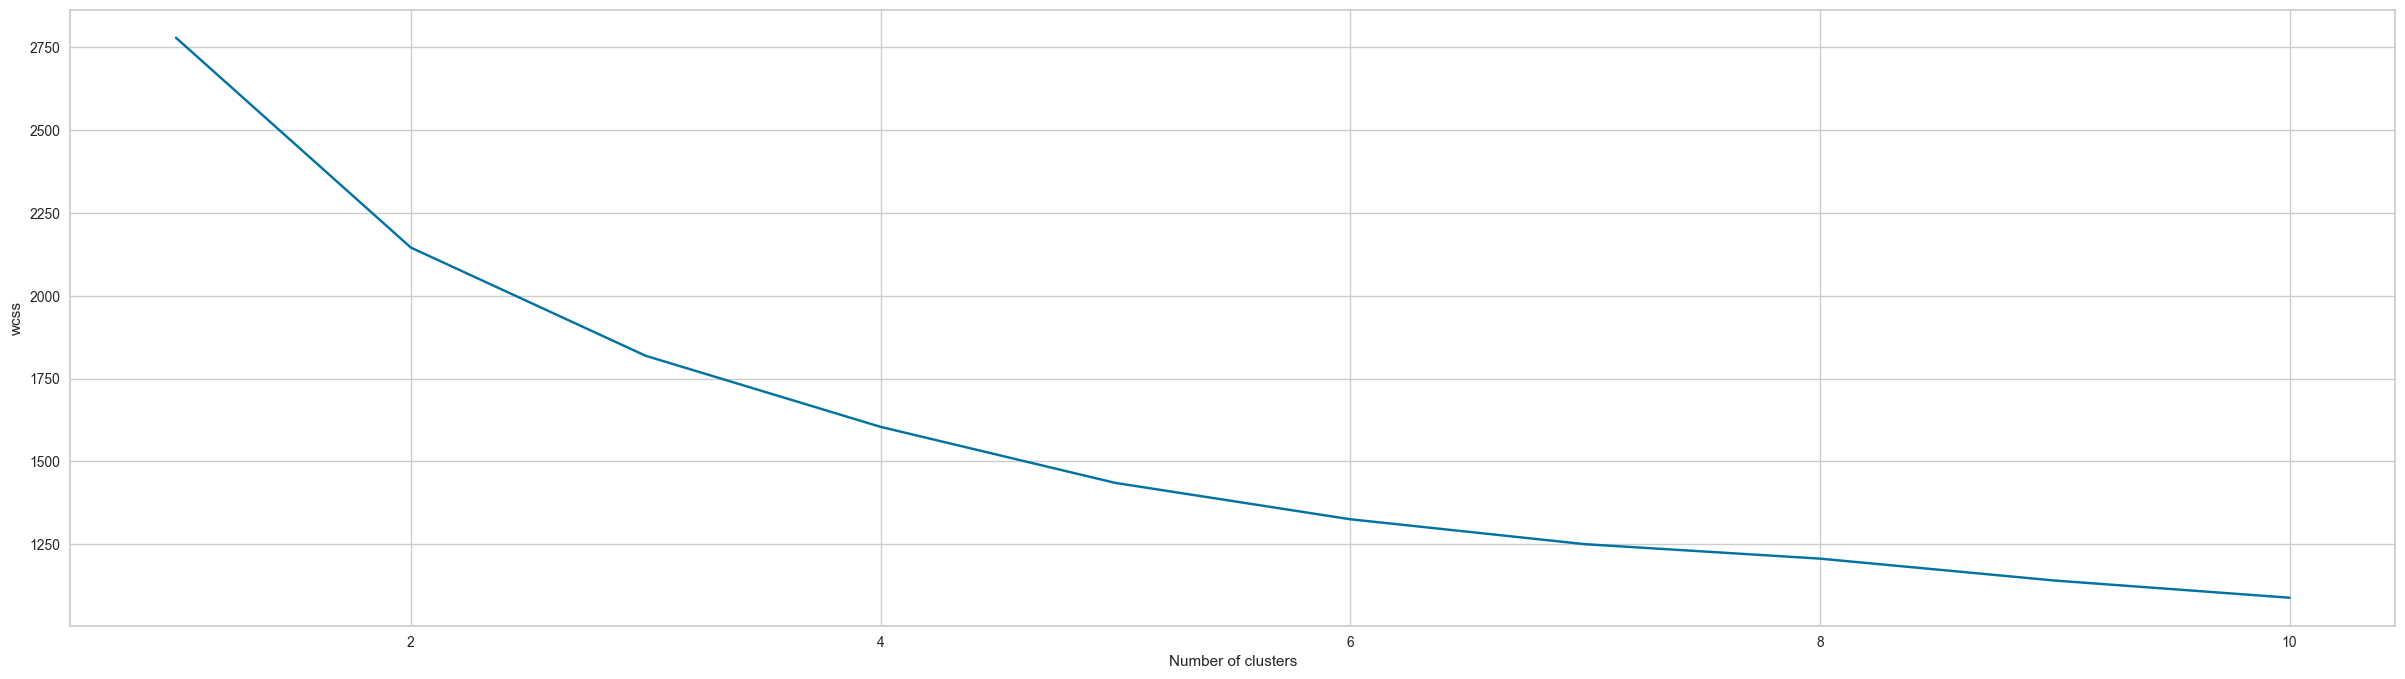

In [34]:
plt.plot(range(1,11),wcss)
plt.xlabel(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

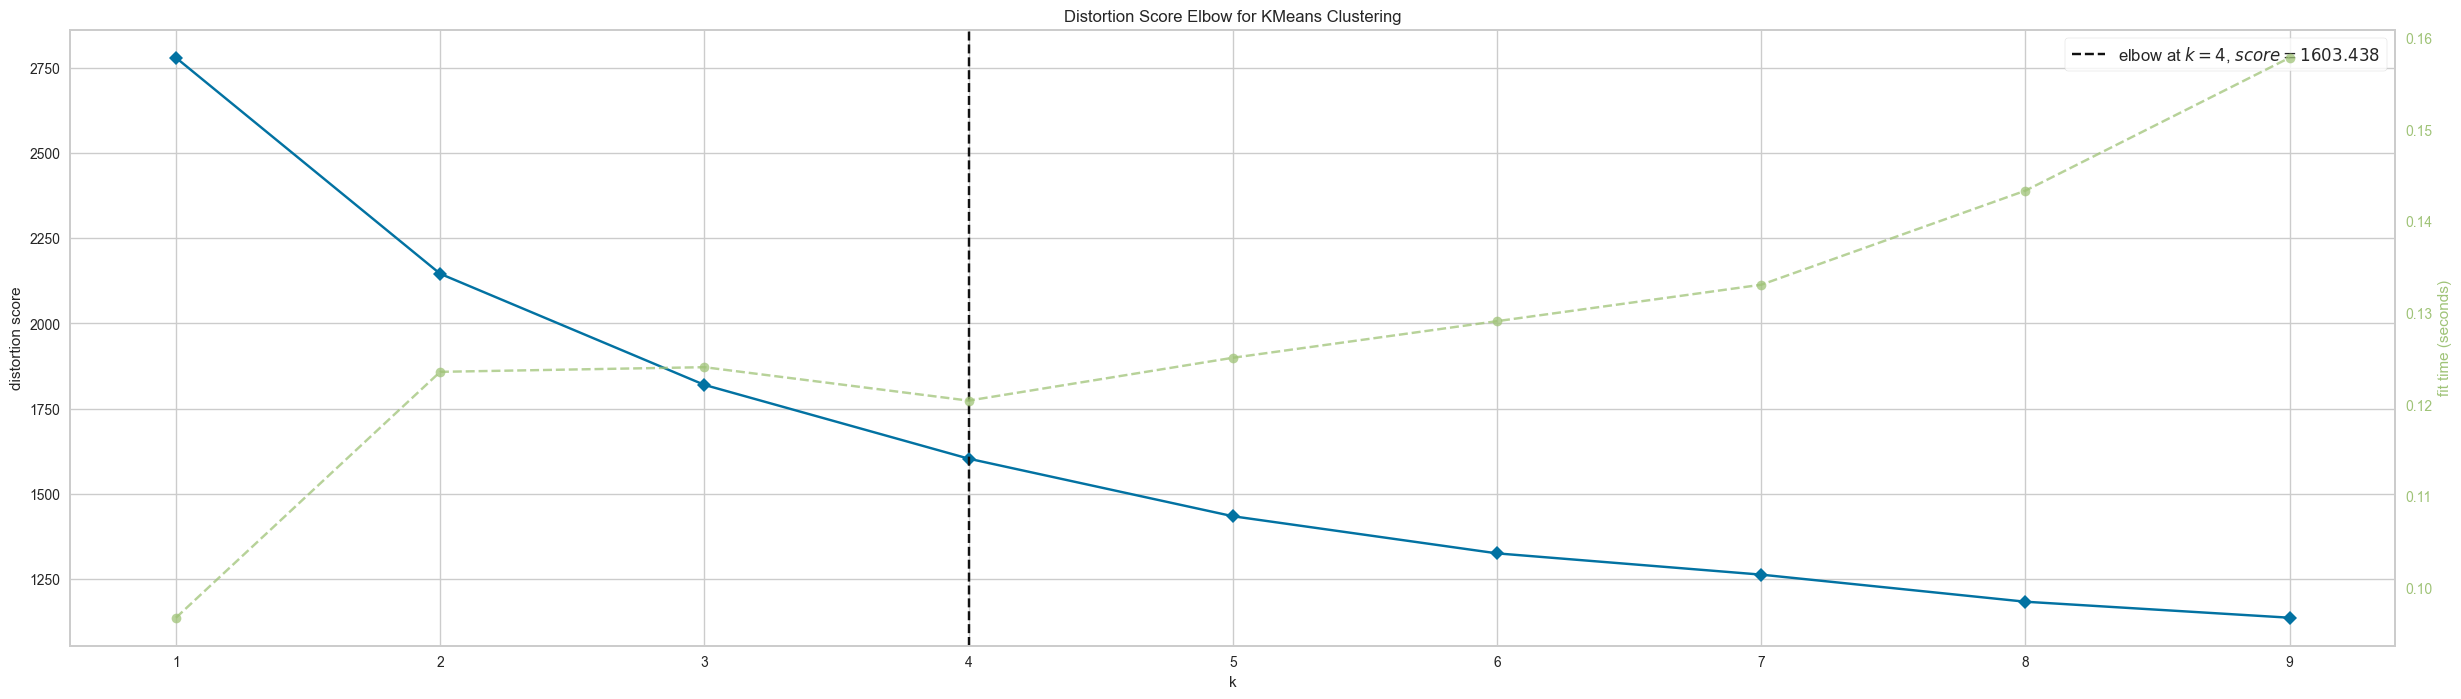

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
kmeans2 = KMeans()
visualizer = KElbowVisualizer(kmeans2, k=(1,10))
visualizer.fit(MD)
visualizer.show()


In [36]:

k_means__model = KMeans(4)
k_means__model.fit_predict(MD)
pca_dfkmeans= pd.concat([pca_df,pd.DataFrame({'cluster':k_means__model.labels_})],axis=1)
pca_dfkmeans.head()
     



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,3
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,0
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,0
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,1
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,3


C:\Users\HP\AppData\Local\Temp\ipykernel_18092\1799859765.py:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax=sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_dfkmeans,palette=['black','violet','green','red','yellow'])
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


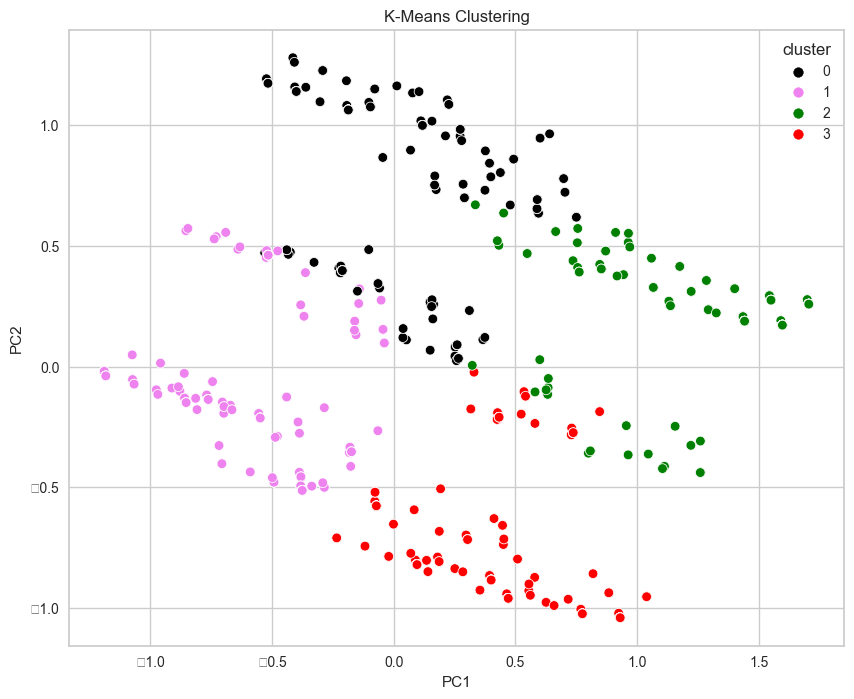

In [37]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_dfkmeans,palette=['black','violet','green','red','yellow'])
plt.title('K-Means Clustering')
plt.show()
     


In [38]:
k_means__model = KMeans(4)
k_means__model.fit_predict(MD)
pca_dfkmeans1= pd.concat([MD,pd.DataFrame({'cluster':k_means__model.labels_})],axis=1)
pca_dfkmeans1.head()


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,3


In [39]:
pca_dfkmeans1['cluster'].value_counts(normalize=True)*100


cluster
0    39.917412
3    21.954577
1    21.610461
2    16.517550
Name: proportion, dtype: float64

<Axes: xlabel='cluster', ylabel='count'>

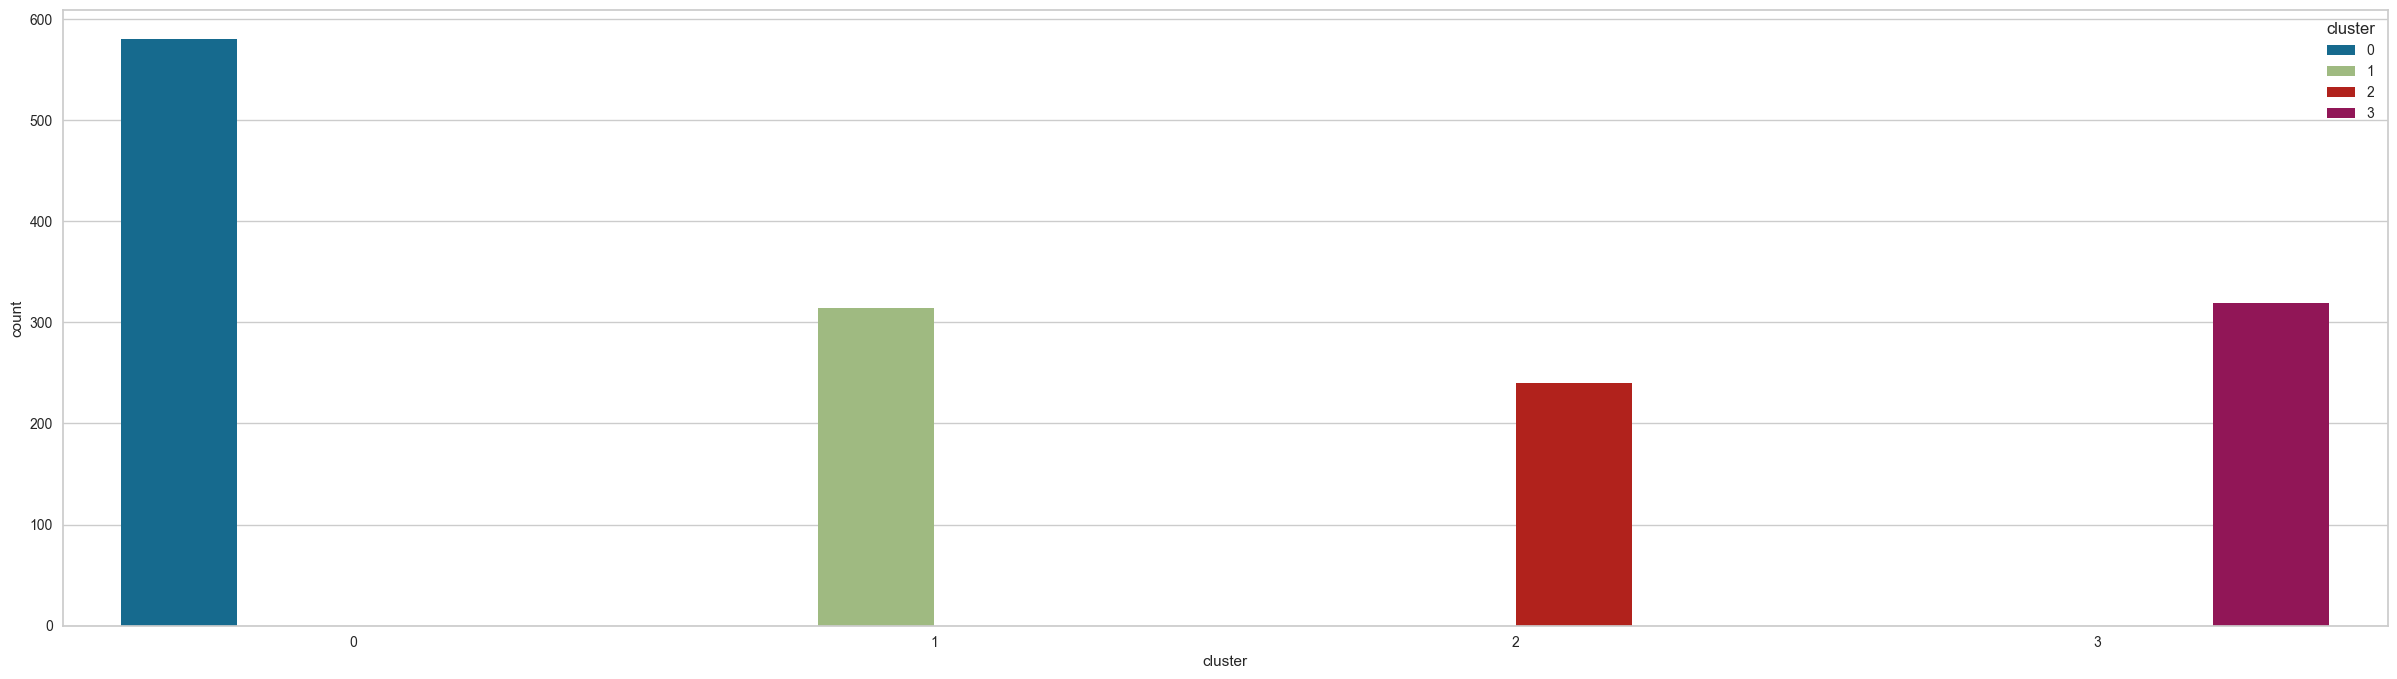

In [40]:
#analysis cluster's
sns.countplot(x ='cluster', data = pca_dfkmeans1,hue = "cluster")


In [42]:
#grouping with cluster 1
cluster_1_df = pca_dfkmeans1[pca_dfkmeans1["cluster"]==0]
cluster_1_df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
3,1,1,0,1,1,1,1,1,0,0,1,0
5,1,1,0,1,0,1,1,1,0,0,0,0
7,1,1,0,1,1,1,1,1,0,0,0,0
15,1,1,0,1,0,1,1,1,0,0,0,0
16,1,1,0,1,1,1,1,1,0,0,0,0


C:\Users\HP\AppData\Local\Temp\ipykernel_18092\3648964466.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=cluster_1_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


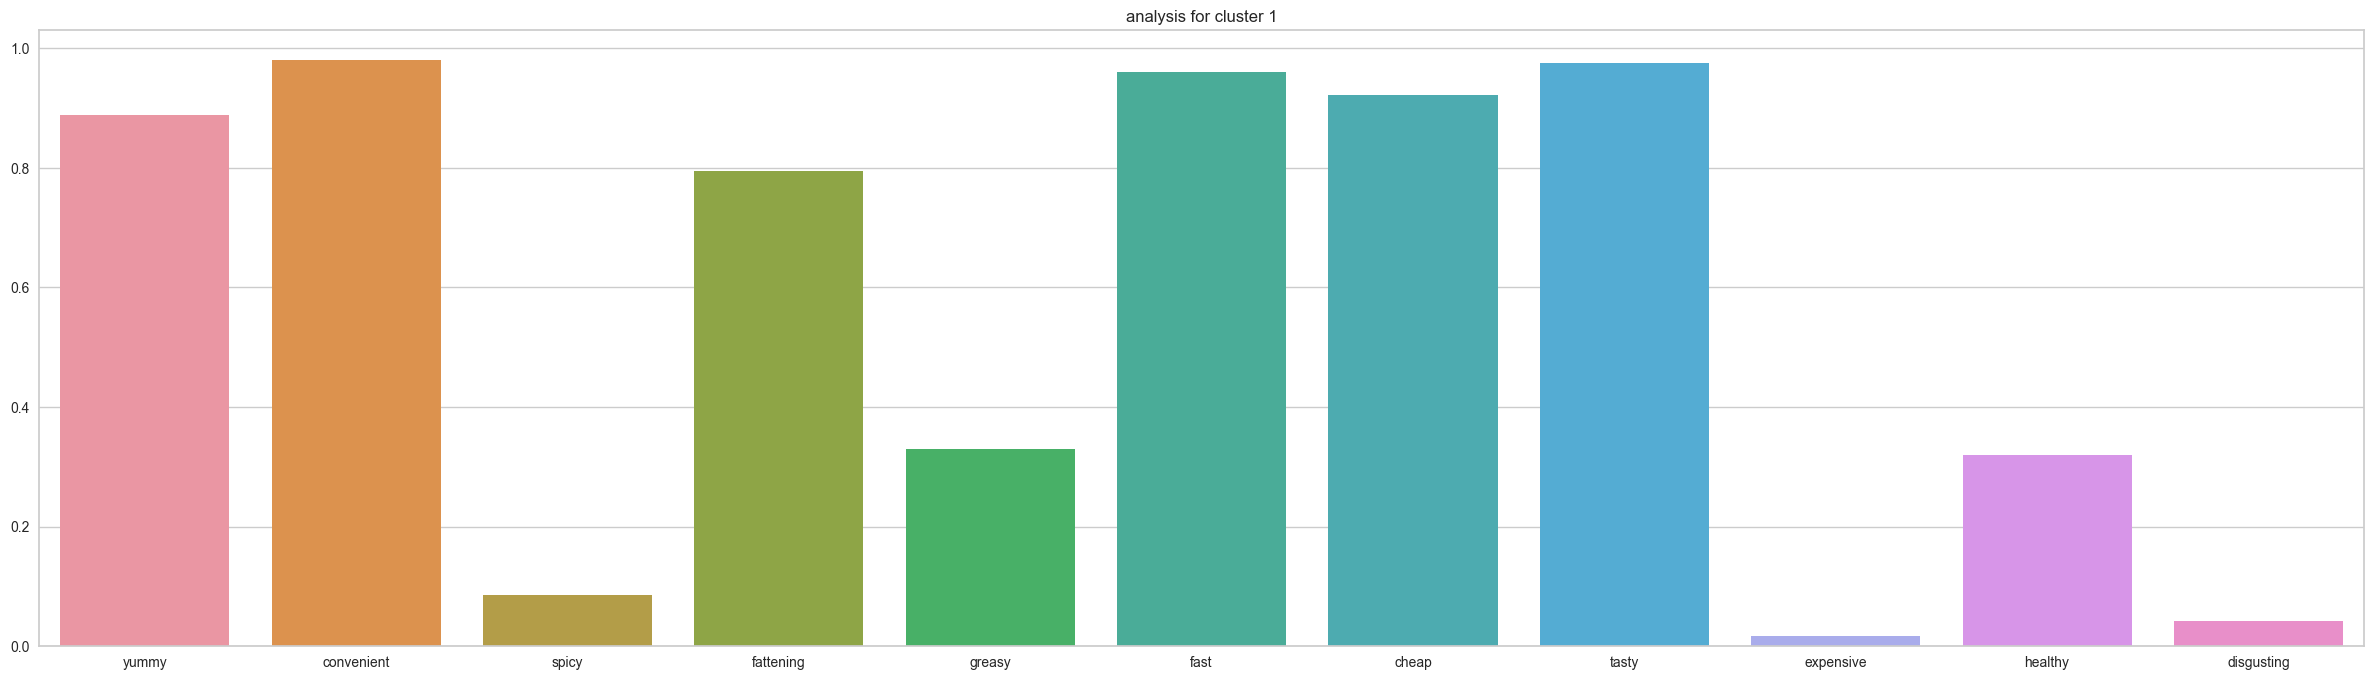

In [46]:

ax = sns.barplot(data=cluster_1_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 1')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18092\2445722129.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


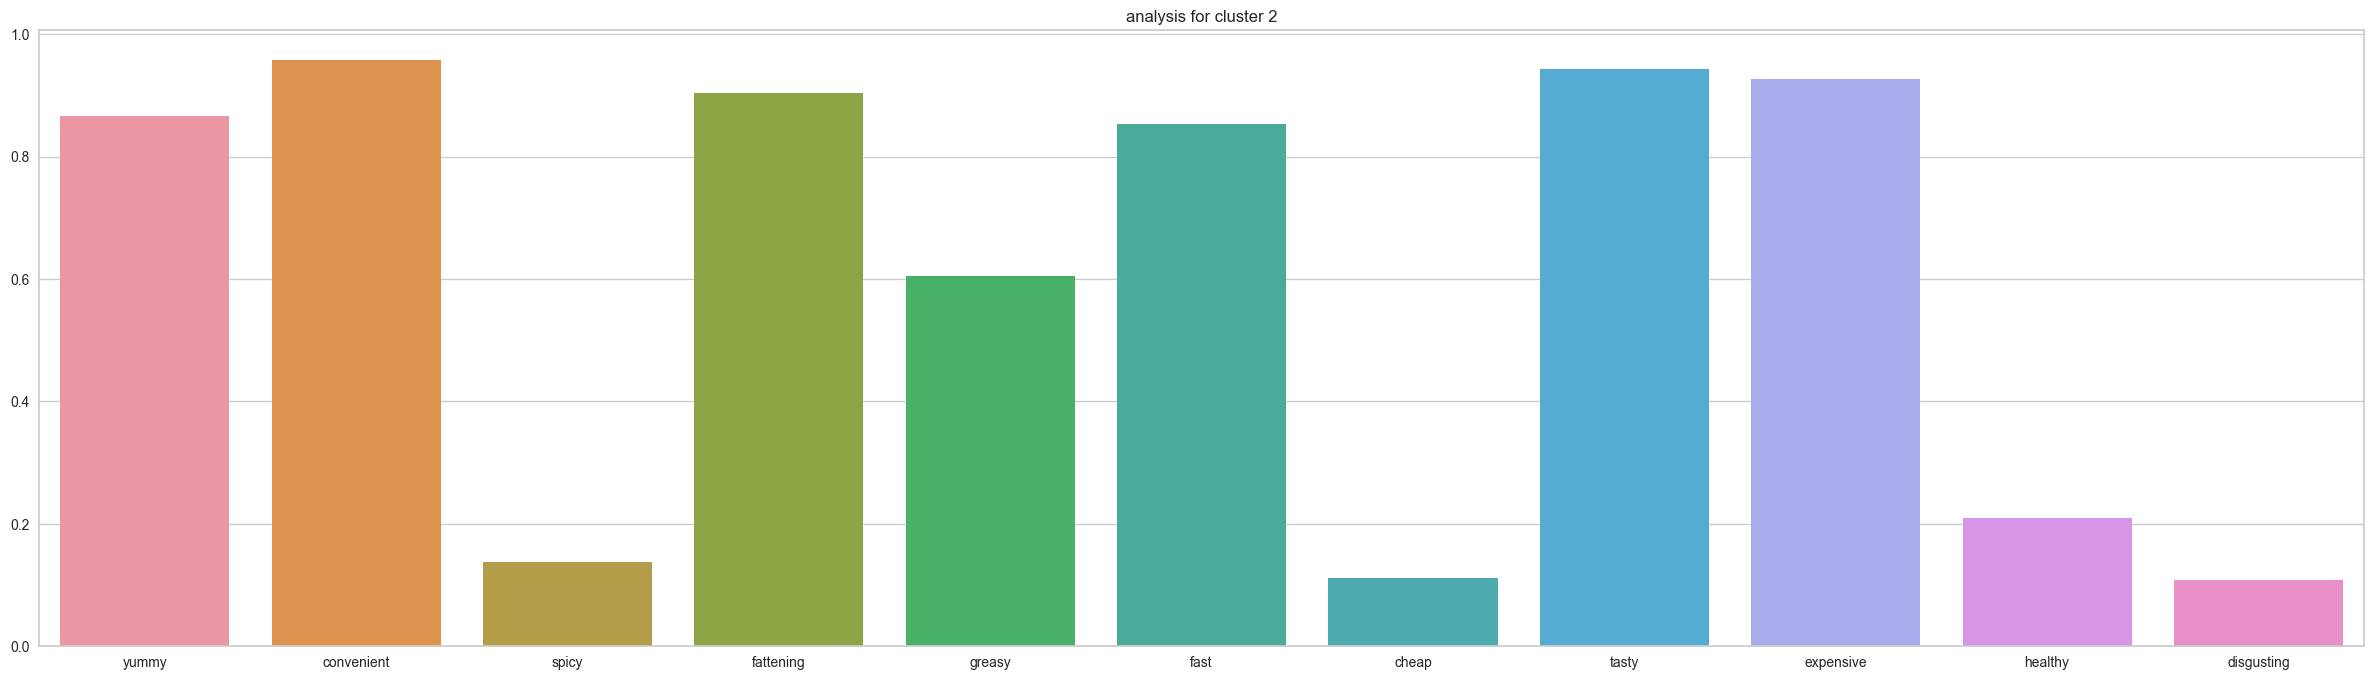

In [47]:
cluster_2_df = pca_dfkmeans1[pca_dfkmeans1["cluster"]==1]
cluster_2_df.head()

ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()

In [50]:
food_new= pd.concat([food,pd.DataFrame({'cluster':k_means__model.labels_})],axis=1)
food_new.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3


In [51]:
food_new["VisitFrequency"]= food_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})


In [52]:
food_new["Gender"]= food_new["Gender"].replace({'Female':0, 'Male':1})



crosstab_gender =pd.crosstab(food['cluster_num'],food['Gender'].replace({1: 'Male', 0: 'Female'}))
crosstab_gender


In [54]:
food_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,2,0,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,2,0,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1,3


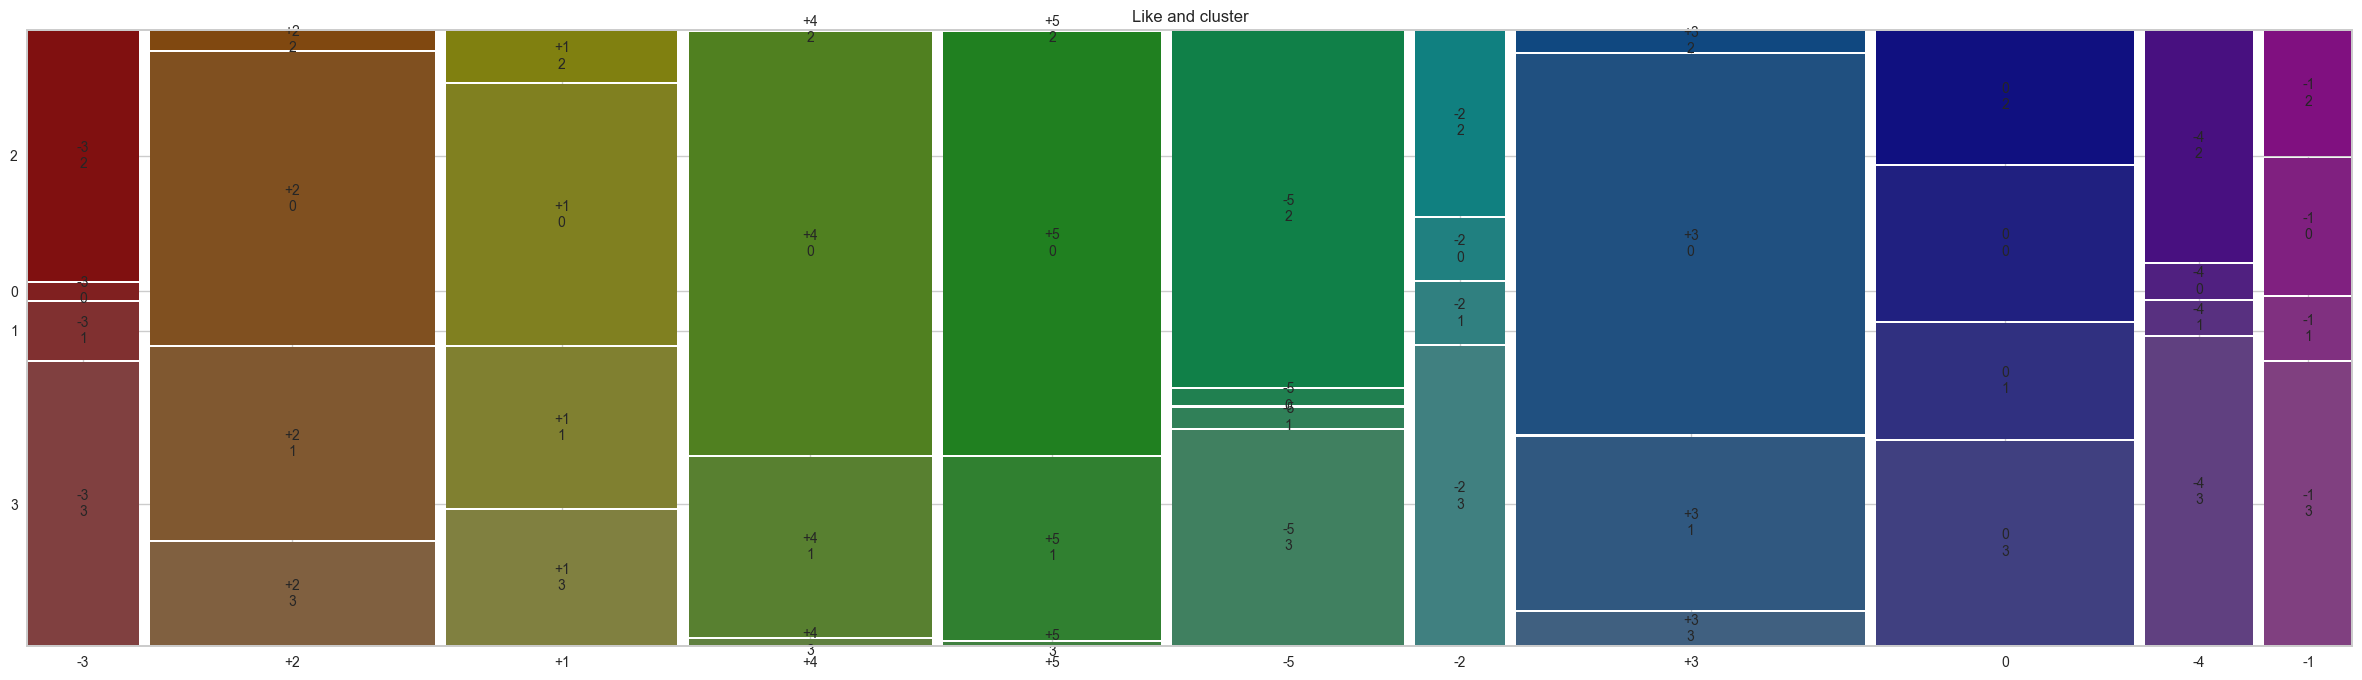

In [57]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(food_new, ['Like','cluster'],title='Like and cluster')
plt.show()


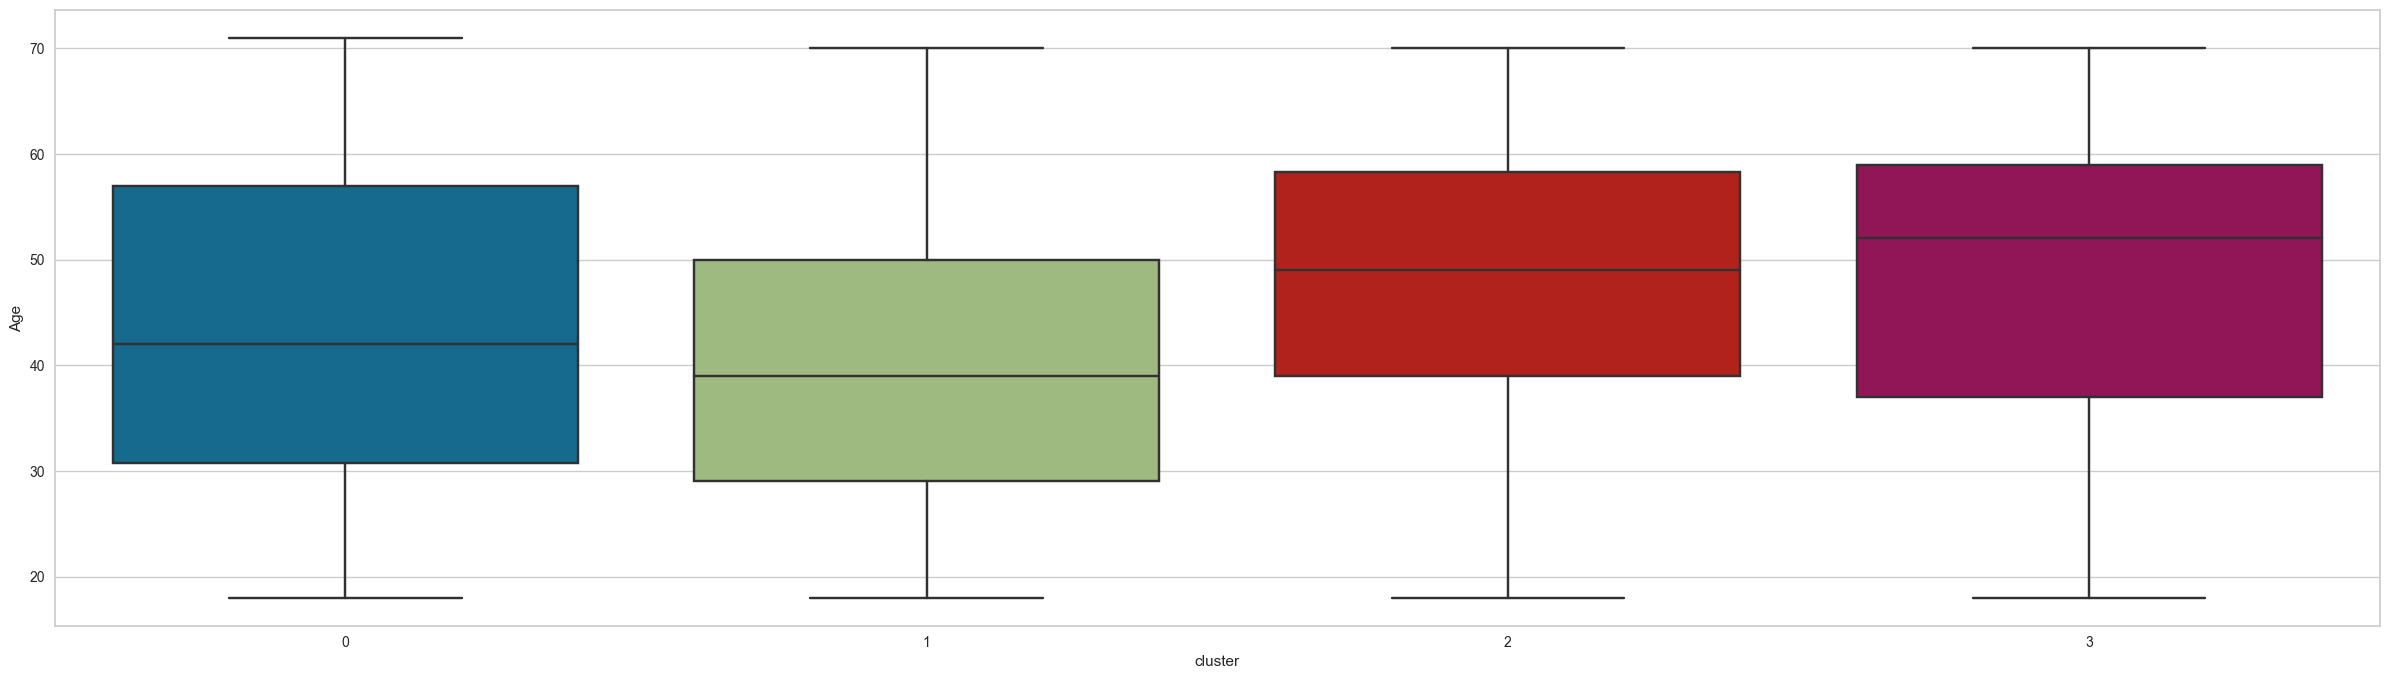

In [59]:
sns.boxplot(x=food_new['cluster'], y=food_new['Age'])
plt.show()

TRAINING AND TESTING

In [61]:
X = food_new.drop(['cluster'],axis=1)
Y= food_new[['cluster']]
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.2)

In [62]:
X_test.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
139,1,1,0,1,1,1,1,1,0,0,0,+2,20,3,1
1303,1,1,0,1,1,1,1,0,0,0,0,0,59,2,1
576,0,0,0,1,1,1,0,0,1,0,0,-5,65,0,0
708,1,1,0,1,0,1,1,1,0,0,0,+4,38,3,0
163,0,0,0,1,1,1,0,0,1,0,1,-5,40,0,1


In [63]:
Y_test.head()


,cluster
139,0
1303,3
576,2
708,0
163,2


In [65]:
classifier = DecisionTreeClassifier(random_state=1234)
model = classifier.fit(X, Y)


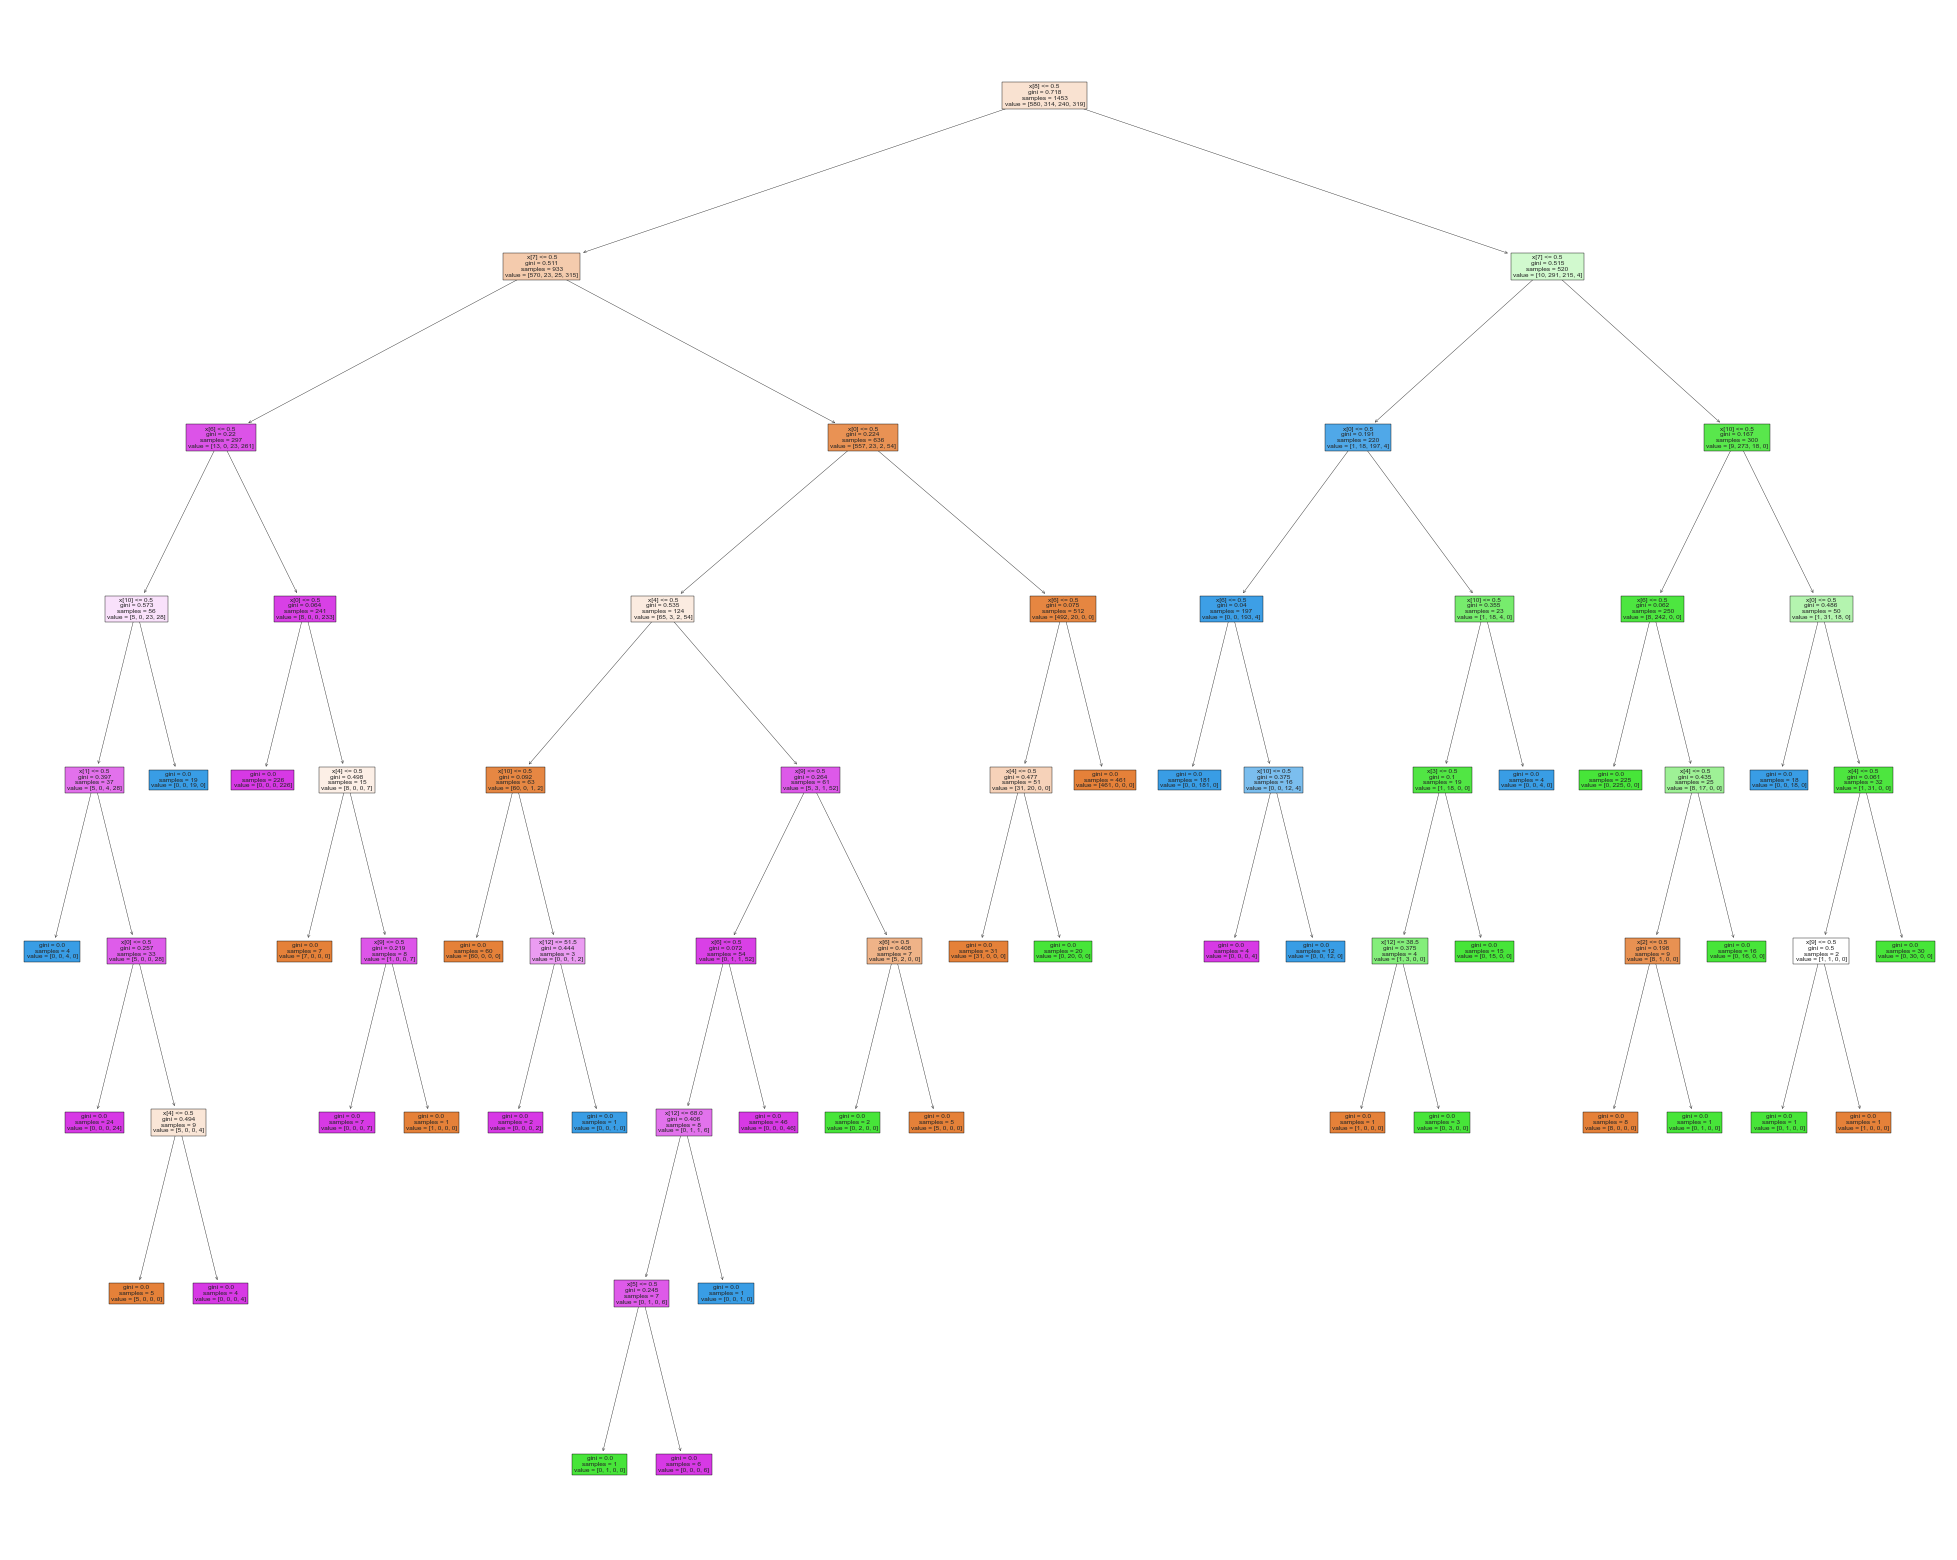

In [67]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,   filled=True)


In [ ]:
import numpy as np
from mixtools import MixModel
from mda import stepflexmix
from sklearn.datasets import make_classification

# Set the random seed
np.random.seed(1234)

# Generate some sample data (replace this with your own data)
X, y = make_classification(n_samples=100, n_features=1)

# Convert the response variable to a 1-dimensional numpy array if needed
y = np.squeeze(y)

# Define the formula
formula = 'y ~ 1'

# Specify the range of the number of mixture components
k = range(2, 9)

# Fit the flexible mixture model
result = stepflexmix(formula, X, k, nrep=10, model='FLXMCmvbinary', verbose=False)

# Access the best model based on the BIC criterion
best_model = result['best_model']

# Access the estimated parameters of the best model
weights = best_model.weights
means = best_model.means
covariances = best_model.covariances

# Access the cluster assignments for each data point
clusters = best_model.predict(X)


In [ ]:
!pip install bioinfokit


In [ ]:
!pip install mixtools

